### Student Information
Name: 岑美茵

Student ID: 109022521

GitHub ID: MeiIanSam

Kaggle name: MaxLu (Team name: MIS)

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

In [2]:
### Begin Assignment Here

# Part 1

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [10]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [12]:
# Answer here
# Here, I follow the code of HW1, sorting and picking out the words with top30 frequencies and plot the graph.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import plotly.express as px 

def top30word(df):
    count_vect = CountVectorizer()
    df_counts = count_vect.fit_transform(df.text)
    term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
    mask = np.argsort(-term_frequencies)[:30]
    return count_vect.get_feature_names_out()[mask], term_frequencies[mask]

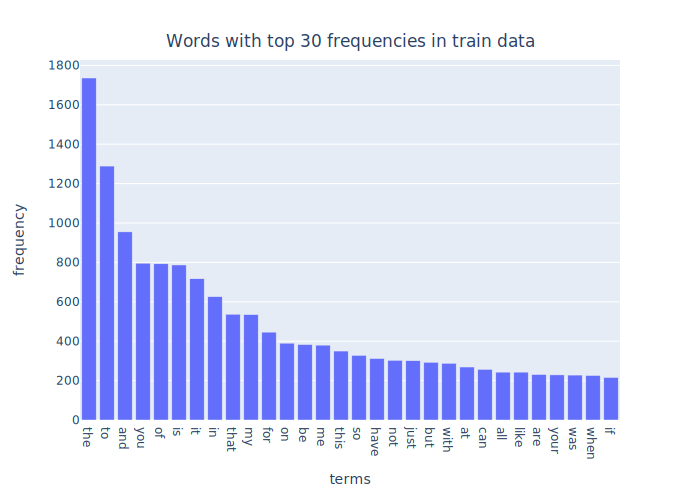

In [13]:
# result of training data.
x,y = top30word(train_df)
df_ = {"terms": x,
      "frequency": y}
fig = px.bar(df_, x = 'terms', y = 'frequency')
fig.update_layout(
    title={
        'text': "Words with top 30 frequencies in train data",
        'y':0.93,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show("svg")

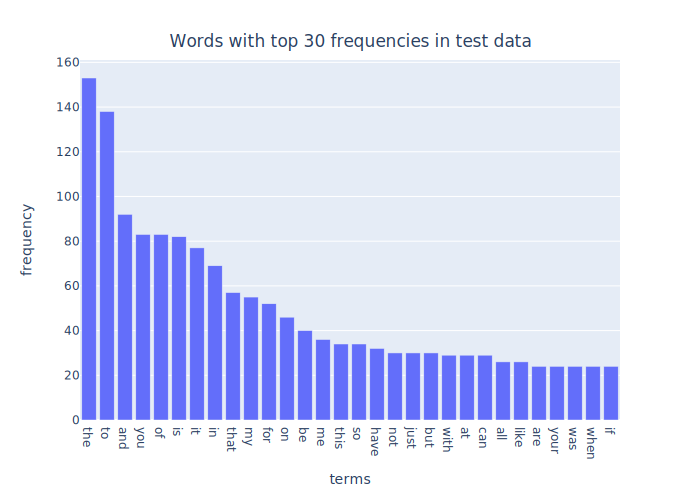

In [14]:
# result of testing data.
fx,y = top30word(test_df)
df_ = {"terms": x,
      "frequency": y}
fig = px.bar(df_, x = 'terms', y = 'frequency')
fig.update_layout(
    title={
        'text': "Words with top 30 frequencies in test data",
        'y':0.93,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show("svg")

In [38]:
### Skip the EDA part###

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html`

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

# check the result
print(train_data_BOW_features)
print(type(train_data_BOW_features))
# add .toarray() to show
print(train_data_BOW_features.toarray())
# check the dimension
print(train_data_BOW_features.shape)
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
print(feature_names[100:110])
print("😂" in feature_names)

  (0, 825)	1
  (0, 1367)	1
  (0, 2168)	1
  (0, 2605)	1
  (0, 3706)	1
  (0, 4043)	1
  (0, 5337)	1
  (0, 8960)	1
  (0, 9785)	1
  (1, 537)	1
  (1, 1026)	1
  (1, 1707)	1
  (1, 3963)	1
  (1, 3964)	1
  (1, 5883)	1
  (1, 8519)	1
  (2, 371)	1
  (2, 537)	1
  (2, 1448)	1
  (2, 1489)	1
  (2, 2493)	1
  (2, 4120)	3
  (2, 4127)	1
  (2, 5172)	1
  (2, 6475)	1
  :	:
  (3611, 9291)	1
  (3611, 9678)	1
  (3612, 1448)	1
  (3612, 1634)	1
  (3612, 3391)	1
  (3612, 3979)	1
  (3612, 4009)	1
  (3612, 4546)	1
  (3612, 4705)	1
  (3612, 4760)	1
  (3612, 5172)	1
  (3612, 5178)	1
  (3612, 5640)	1
  (3612, 5957)	1
  (3612, 6098)	1
  (3612, 6246)	1
  (3612, 6371)	1
  (3612, 6424)	1
  (3612, 7017)	1
  (3612, 8920)	1
  (3612, 8930)	1
  (3612, 9119)	1
  (3612, 9207)	1
  (3612, 9782)	1
  (3612, 10051)	1
<class 'scipy.sparse._csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(3613, 10115)
['2k17' '2much' '2nd' '30' '300' '301' '30am' '30

In [22]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
print(train_data_BOW_features_500.shape)
print(train_data_BOW_features_500.toarray())
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
print(feature_names_500[100:110])
print("😂" in feature_names_500)

(3613, 500)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
['change' 'cheer' 'cheerful' 'cheerfully' 'cheering' 'cheery' 'come'
 'comes' 'could' 'country']
True


---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [24]:
# Answer here
# I use the TfidfVectorizer in sklearn and set the `max_fatures` to 1000, and show the names for features [100:110].

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
tfidf_vectorizer.fit(train_df['text'])

feature_names = tfidf_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


array(['sadness', 'joy', 'fear', 'sadness', 'anger', 'joy', 'joy', 'fear',
       'anger', 'joy'], dtype=object)

---
## 4. Results Evaluation

In [33]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

training accuracy: 0.99
testing accuracy: 0.68
              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


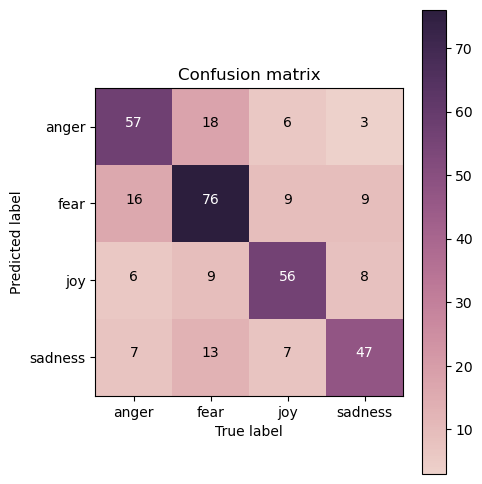

In [28]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

### Answer here
1. First, I would like to convince you that, the x and y labels are wrong in the confusion matrix graph, they are swapped. Which means that x label should be prediction label and y label should be the true label. Assume the labels that are shown in the above graph is correct, with the recall = TP / (TP + FN) that the denomination is the number of true values, so the denomination is computed by the column-wise sum. For example, in the class sadness: Recall = 47/(48+8+9+3) = 0.701, but this value is the precision value in the classification report. In another point of view, the denominator of precision is the row-wise sum: precision of sadness: 47/ (47+7+13+7) = 0.635 which is the recall value in the classification report. I hope this can convince you the x,y labels are swapped.
2. The precision value of joy class is the best among 4 classes, this is reasonable because this is the only class presenting `good` emotion while others are `bad`.
3. From the confusion matrix, we can see that the model is confused by the data of anger and fear. It is reasonable, because when people face dangerous, they will choose fight or escape. Therefore, I think in some case of anger and fear, they are presenting they meet something dangerous (or take some risks), the words they used are similar, but the reponse of people are quite different.
4. We can see that the training accuarcy is extremely high (0.99) but testing accuarcy is low (0.68) with very large difference (0.31). Overfitting occurs, this is common in the model of decision tree because the it is a greedy algorithm and split until pure case. We need pruning or booststrap method to avoid overfitting.


---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

training accuracy: 0.79
testing accuracy: 0.7
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



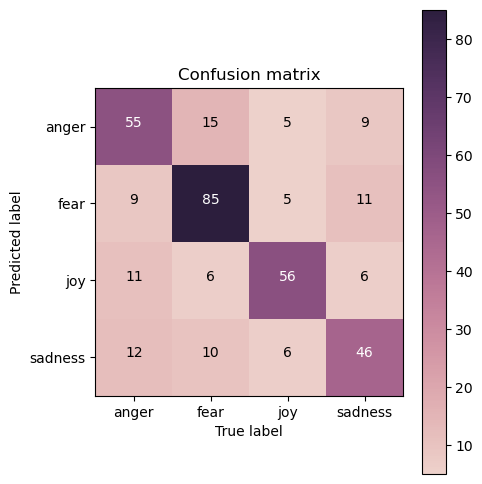

In [34]:
# Answer here
# Here I built a multinomial naive bayes classifier which is followed by the reference.
# and follower the process of session 3 and 4 to get the classification report and confusion matrix.
from sklearn.naive_bayes import MultinomialNB

clf_mnb = MultinomialNB()
clf_mnb.fit(X_train, y_train)
y_pred_mnb_train = clf_mnb.predict(X_train)
y_pred_mnb_test = clf_mnb.predict(X_test)

from sklearn.metrics import accuracy_score
mnb_acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_mnb_train)
mnb_acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_mnb_test)

print('training accuracy: {}'.format(round(mnb_acc_train, 2)))
print('testing accuracy: {}'.format(round(mnb_acc_test, 2)))

print(classification_report(y_true=y_test, y_pred=y_pred_mnb_test))

cm = confusion_matrix(y_true=y_test, y_pred=y_pred_mnb_test)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

### Answer here

From the above results, the validation accuracy between two models are almost the same (DT: 0.69, NB: 0.7); the training accuracy of Naive Bayes classifier is lower than the training accuracy of Decision tree model. We only judge the overfitting is happened or not by the difference of training and testing accuaracy, so the overfitting of Naive Bayes model is not strong as the Decision Tree model.

Decision tree will split the data until the data become pure. Real data is dirty, especially in our case we have 500 features, the number of spliting will be propotional to the number of data. For each node, we need to estimate the threshold and feature, which is at least 2 parameters to describe, which means that for the decision tree model, the number of parameters is at least 2\*3613 = 7226. In the Naive bayes model, the number of parameter depends on the asspumtion of the conditional probabiltiy, which is multinomial distribution in our case. For the multinomial distribuition, one feature needs two parameters ($\mu$, $\sigma$) to describe (500 features in our case), and because we need conditional probabiltity for 4 class, the number of parameters is around 4\*2\*500 = 4000. Therefore, model complexity of naive bayes is less than the decision tree model, and cause less overfitting phenomenon.

And for the performance of data `fear` and `anger`, the naive bayes model is less confused if we compare to the decision tree model. The naive bayes model takes the advantage of its output which is the probability in continous value, which can describe the meticulous difference between output. But for the decision tree model, it only output yes or no for each node. This makes the model of naive bayes is more abel to describe the difference between `fear` and `anger`.

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

In [37]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)
check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2947    sadness
3582    sadness
1330       fear
2824        joy
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [39]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

input_shape:  500
output_shape:  4
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense_3 (Dense)             (None, 64)                32064     
                                                                 
 re_lu_2 (ReLU)              (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_3 (ReLU)              (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                                 
 softmax_1 (Softmax)    

In [40]:
## predict
pred_result = model.predict(X_test, batch_size=128)
print(pred_result[:5])

pred_result = label_decode(label_encoder, pred_result)
print(pred_result[:5])

3/3 [==============================] - 0s 1ms/step
[[5.3839839e-01 1.7783996e-02 2.7623178e-02 4.1619441e-01]
 [3.0367094e-06 1.3238362e-07 9.9999678e-01 4.6500986e-08]
 [1.5778437e-02 7.9366672e-01 1.7458583e-01 1.5969044e-02]
 [4.9222149e-02 1.7244753e-05 2.4007788e-01 7.1068269e-01]
 [9.9999344e-01 2.6492157e-07 2.6654436e-06 3.7045741e-06]]
['anger' 'joy' 'fear' 'sadness' 'anger']


In [41]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

testing accuracy: 0.67


,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.352062,1.341145,0.406340,1.287122
1,1,0.620260,1.034718,0.642651,0.949622
2,2,0.789372,0.607697,0.694524,0.807370
3,3,0.846942,0.420605,0.688761,0.821536
4,4,0.892610,0.320273,0.677233,0.852425
5,5,0.909494,0.260148,0.677233,0.925878
6,6,0.924993,0.215273,0.662824,1.004295
7,7,0.937725,0.185242,0.668588,1.063138
8,8,0.954885,0.153380,0.659942,1.139019
9,9,0.957653,0.135369,0.668588,1.157096


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

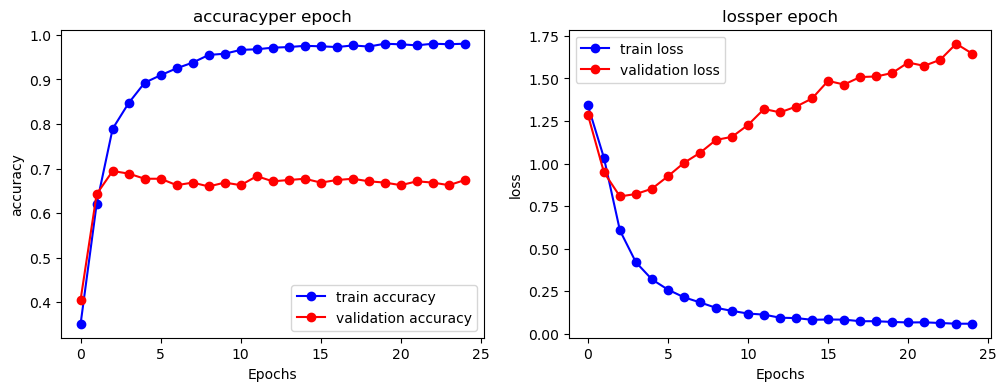

In [47]:
# Answer here
fig = plt.figure(figsize = (12,4))
for n, f in zip(range(2), ['accuracy', 'loss']):
    ax = fig.add_subplot(1, 2, n+1)
    x = training_log['epoch']
    y1 = training_log[f]
    y2 = training_log[f'val_{f}']
    ax.plot(x, y1, 'o-', label=f'training {f}', color = 'b')
    ax.plot(x, y2, 'o-', label=f'validation {f}', color = 'r')
    ax.legend()
    ax.set_title(f + "per epoch")
    ax.set_xlabel('Epochs')
    ax.set_ylabel(f)
plt.show()

### interpretation.

We can observe that, the training accuarcy and loss are already converge; the validation accuracy is converge also, but it appears a huge difference from the training accuracy. On the other hand, the validation loss is much greater than the training loss. In conclustion, overfitting occurs.

Besides, validation loss is still increase, but validation accuracy is converge already. It is because model becomes assertive, i.e. the constrast between prediction values tends to be large. In the calculation of accuarcy, it only depends on the prediction result (right/wrong), but for the loss, it depends on the values of prediction probability. When the model becomes more and more assertive, it will not affect the accuracy because it is wrong already, but the probability is worse than before. This is also a phenomenon of overfitting. 

The overfitting occurs when number of epoch greater than 4. I think there are too many parameters in the model, only 3000+ data but with 30000+ parameters, the model is likely to memeorize most the training data (training accuaracy ~ 0.98) which leads to overfitting.

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

In [49]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
print(train_df[['id', 'text', 'text_tokenized']].head())

## create the training corpus
training_corpus = train_df['text_tokenized'].values
print(training_corpus[:3])

         id                                               text  \
2947  40120  where broken hearted lovers do cry away their ...   
3582  40755  @hannah_2401 hannah stop being mournful and ch...   
1330  20473  I saved him after ordering him to risk his lif...   
2824  30820  hate overthinking e v e r y t h i n g like i j...   
1459  20602  3:45am and off to the hospital! Elouise's wate...   

                                         text_tokenized  
2947  [where, broken, hearted, lovers, do, cry, away...  
3582  [@, hannah_2401, hannah, stop, being, mournful...  
1330  [I, saved, him, after, ordering, him, to, risk...  
2824  [hate, overthinking, e, v, e, r, y, t, h, i, n...  
1459  [3:45am, and, off, to, the, hospital, !, Eloui...  
[list(['where', 'broken', 'hearted', 'lovers', 'do', 'cry', 'away', 'their', 'gloom'])
 list(['@', 'hannah_2401', 'hannah', 'stop', 'being', 'mournful', 'and', 'chill', '💁'])
 list(['I', 'saved', 'him', 'after', 'ordering', 'him', 'to', 'risk', 'his', 'li

In [50]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

In [51]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
print(word_vec)

# Get the most similar words
word = 'happy'
topn = 10
print(word2vec_model.wv.most_similar(word, topn=topn))

[ 2.14663237e-01  7.16879725e-01 -2.77562011e-02 -4.20192748e-01
  4.06209268e-02 -1.47882962e+00  5.42626083e-01  1.46031368e+00
 -3.42535853e-01 -8.69747639e-01 -3.81546170e-01 -6.54734313e-01
 -2.38593712e-01  2.82798678e-01 -2.42292970e-01 -7.06249893e-01
  3.43435973e-01 -5.62452435e-01 -1.57502871e-02 -1.17647207e+00
  4.64448869e-01  6.02108181e-01  3.11552048e-01  3.26007605e-01
  2.45304331e-01 -4.13282402e-02 -3.31363857e-01  5.29083312e-01
 -7.99084306e-02 -2.28610829e-01  9.50954563e-04  1.27662137e-01
  2.17439577e-01 -7.66990066e-01 -1.81786150e-01  3.86505008e-01
  2.84145474e-01 -1.97778270e-01 -3.45039577e-03 -6.87031686e-01
  3.60528044e-02  1.39560729e-01 -3.33890952e-02  5.01174331e-01
  7.70028651e-01 -4.02321190e-01 -9.91667092e-01 -9.49932560e-02
  1.63834199e-01  5.30253232e-01 -4.85335290e-02 -5.65499783e-01
  1.70264766e-01 -1.47561785e-02 -6.08529925e-01 -2.28061244e-01
  6.18024766e-01 -7.69978836e-02  8.75503421e-02  1.92906767e-01
  1.07084937e-01 -3.03336

In [52]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

In [53]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.9336148500442505),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158350825309753),
 ('thanks', 0.9150084853172302),
 ('merry', 0.9053248763084412),
 ('bless', 0.902732253074646),
 ('wish', 0.9013165235519409)]

In [54]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


#### Answer here

a. Use a sentence vector to represent the sentence.
1. Direct summation of the word vectors: Because we have all the word vectors, then we can add up the words which are contained in sentence. For example: "I have a dog" --> word_vector("I") + word_vector("have") + word_vector("a") + word_vector("dog") --> sentence vector. However, this is generated by a strong assumption that every word contributes equally in the sentence, but of course we know that it is not true.
3. Weighted summation of word vectors: To solve the drawback of point1 we have mentioned, we can extend the idea of point1 by TFIDF concept. Then the contribution of different words are computed, which will caused the simply summation of word vectors become weighted summation. We can model that when the word get higher TFIDF value, then the coeffient in front of that word will become higher; if TFIDF value is lower, then coeifficient is lower. Note that with the normalization of coefficient $\sum_{i} c_{i} = 1$.

Once we have the sentence vector, then it is the same as the data with multiple features and attempt to predict value, we can choose the models we familiar with.

b. Concat word vectors become a matrix, and use model to solve the problem.
1. It is worth noting that an obvious drawback of point(a) is it ignore the order of word that appear in the sentence, it is also an important information that we care. We can use sequential model to capture the information between words with the consideration of order. For example: RNN model. With time evolution, we input the words vector sequentially, and each time step RNN unit outputs the memory it learns, which has considered the memories of previous time steps. We can use the output of final time step to predict.

### 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


In [58]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]
print(X)

from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
print(kmeans_model.predict([word_vec]))

#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
print(kmeans_model.predict([word_vec]))

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
[array([ 2.14663237e-01,  7.16879725e-01, -2.77562011e-02, -4.20192748e-01,
        4.06209268e-02, -1.47882962e+00,  5.42626083e-01,  1.46031368e+00,
       -3.42535853e-01, -8.69747639e-01, -3.81546170e-01, -6.54734313e-01,
       -2.38593712e-01,  2.82798678e-01, -2.42292970e-01, -7.06249893e-01,
        3.43435973e-01, -5.62452435e-01, -1.57502871e-02, -1.17647207e+00,
        4.64448869e-01,  6.02108181e-01,  3.11552048e-01,  3.26007605e-01,
        2.45304331e-01, -4.13282402e-02, -3.31363857e-01,  5.29083312e-01,
       -7.99084306e-02, -2.28610829e-01,  9.50954563e-04,  1.27662137e-01,
        2.17439577e-01, -7.66990066e-01, -1.81786150e-01,  3.86505008e-01,
        2.84145474e-01, -1.97778270e-01, -3.45039577e-03, -6.87031686e-01,
        3.60528044e-02,  1.39560729e-01, -3.33890952e-02,  5.01174331e-01,
        7.70028651e-01, -4.02321190e-01, -9.91667092e-01, -9.49932560e-02,
        1.63834199e-01,  5.


## 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below:

In [59]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


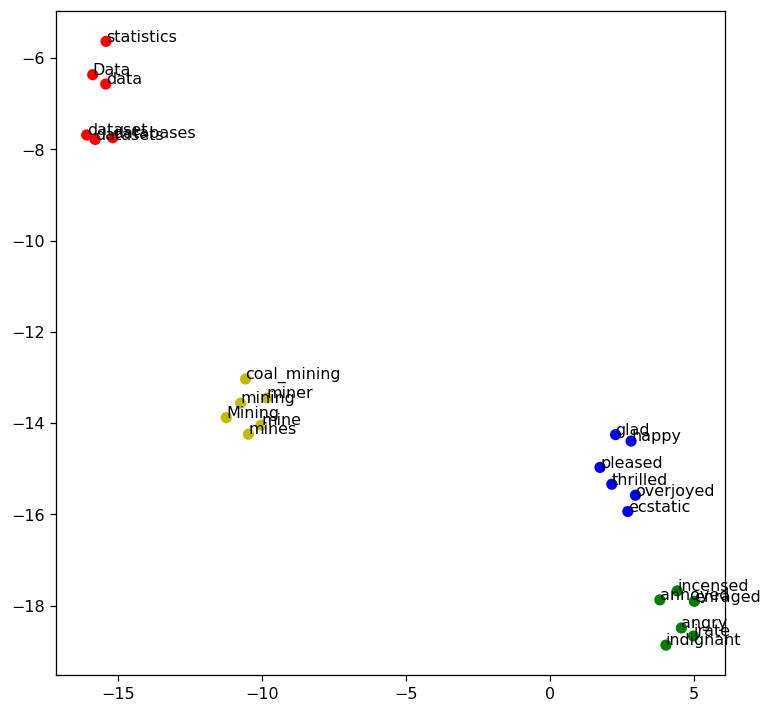

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [61]:
# Answer here
# Here, I simply change the parameter `topn` to 15, and `word_list` become ['happy', 'angry', 'sad', 'fear'].
# with constructing `sad_words` and `fear_words` instead of `data_words` and `mining_words`

word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn


target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry', 'sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet', 'fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']


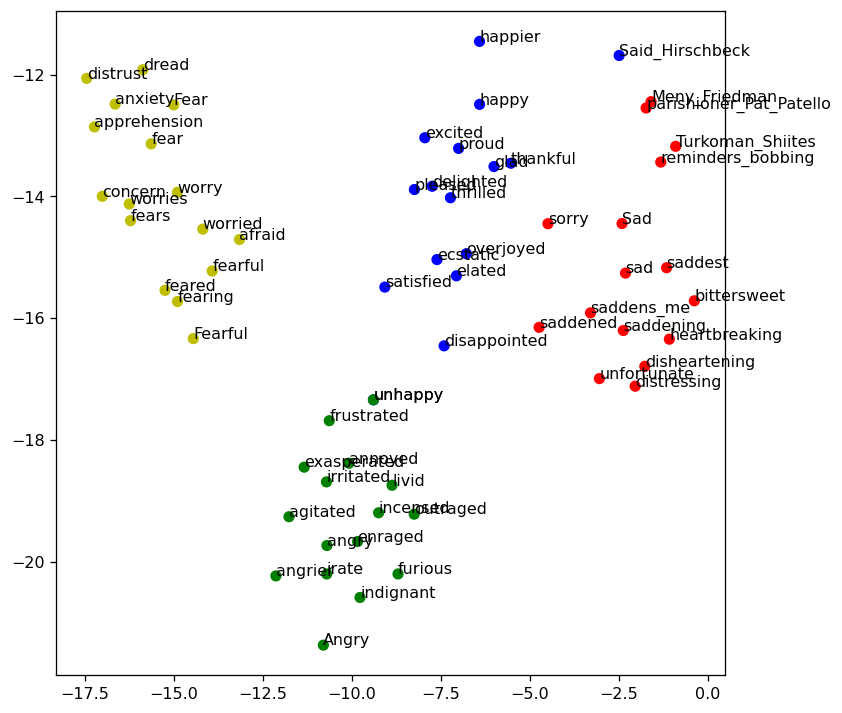

In [62]:
# Here, follow the code of 9.2 and plot the 2D graph.
## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# Part 3

I would like to explain what I have done in the competition by my code.

In [1]:
# Here I import all the package I need.
import json
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt

### Load data, simple visualization and statistic, preprocessing and spliting and construct dataset

In [2]:
# Load data and form the text data frame, with columns `tweet_id` and `text`.
tweets = []
with open('tweets_DM.json', 'r') as file:
    for line in file:
        tweets.append(json.loads(line))

ids = []
txts = []
for i in range(len(tweets)):
    ids.append(tweets[i]['_source']['tweet']['tweet_id'])
    txts.append(tweets[i]['_source']['tweet']['text'])

df_text = pd.DataFrame()
df_text["tweet_id"] = ids
df_text["text"] = txts

In [3]:
df_text

,tweet_id,text
0,0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,0x28b412,"Confident of your obedience, I write to you, k..."
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...
1867530,0x316b80,When you buy the last 2 tickets remaining for ...
1867531,0x29d0cb,I swear all this hard work gone pay off one da...
1867532,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,0x24faed,"Ah, corporate life, where you can date <LH> us..."


### ****Interpretation:
We can see the text is dirty, many emojis which are codes but cannot be interpreted, and many usernames appear which contain no information, and symbol `<LH>` is meaningless. So I think we need to do some preprocessing to make the text data to be clear.

In [4]:
# Here, are all the preprocessing works I try to do for the text data.
# I need to claim that I have experiment that preprocessing is not very crucial for the results.
# I will give more explanation when I talk about the model.
import re
import string

punctuation = string.punctuation + "“”" + "’"

def remain_ch(text): #This function is aimed to remove all the non-ASCII characters.
    tokens = text.split(" ")
    result = []
    for token in tokens:
        new_token = "".join([x for x in token if x in 'abcdefghijklmnopqrstuvwxyz'])
        if token == new_token:
            result.append(token)
    return " ".join(result)

def preprocessing(text):
    text = text.lower() #let all the characters become lower case.
    text = text.replace("<LH>", "") #remove the `<LH>`
    matchs = re.findall("(@\w+)", text) #find the @username 
    for match in matchs: # and remove them.
        text = text.replace(match, "")
    matchs = re.findall("(#\w+)", text) #find the hashtags
    for match in matchs: # and remove them
        text = text.replace(match, match[1:])
    matchs = re.findall(r'http\S+', text) #find URL
    for match in matchs: #and remove them
        text = text.replace(match, "")
    emoji_pattern = re.compile("[" #find emojis
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) #and remove them
    ### Below, I replace all the short forms to full forms.
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"cant", "can not", text)
    text = re.sub(r"cannot", "can not ", text)
    text = re.sub(r"what\'s", "what is", text)
    text = re.sub(r"What\'s", "what is", text)
    text = re.sub(r"\'ve ", " have ", text)
    text = re.sub(r"n\'t", " not ", text)
    text = re.sub(r"i\'m", "i am ", text)
    text = re.sub(r"I\'m", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\’ll", " will ", text)
    text = re.sub(r"&", " and ", text)
    text = re.sub(r"\|", " or ", text)
    text = re.sub(r"=", " equal ", text)
    text = re.sub(r"\+", " plus ", text)
    text = re.sub(r"\$", " dollar ", text)
    text = text.replace("\\u200d", '')
    text = text.replace("\\xa0", '')
    ######
    text = ' '.join([x for x in text.split(' ') if x]) #for multiple space --> become one space only.
    text = ''.join([char for char in text if char not in [str(x) for x in range(0,10)]]) # remove number.
    text = ''.join([char for char in text if char not in punctuation]) #remove punctuation.
    text = remain_ch(text)
    return text

# df_text['text'] = df_text['text'].apply(preprocessing)
# df_text.iloc[2000:2050]['text'].values

### ****Interpretation:
I have tried a lots of preprocessing works: remove all the non-ASCII characters, let all the characters become lower case, remove @username , remove hashtags, remove URLs, remove emojis, replace the short forms to full forms, remove the multiple space, remove numbers and remove punctuations.

I have done experients by the Distilbert, it show that the results are comparable no matter we do preprocessing or not (distil bert tokenizer: lower case + \[CLS] and \[SEP] ). 

Note:
validation accuarcy: preprocessing: 0.62, no preprocessing: 0.61

public score: preprocessing: 0.51, no preprocessing: 0.512

However, I think emojis and hashtags will also contain information, but I didn't find a good way to preprocess this kind of information. But at last, the tokenizer of tweetbert model helps us to transform them, so the performance is better.

In [10]:
# Here, load the emotion data
df_emotion = pd.read_csv("emotion.csv")
df_identification = pd.read_csv("data_identification.csv")

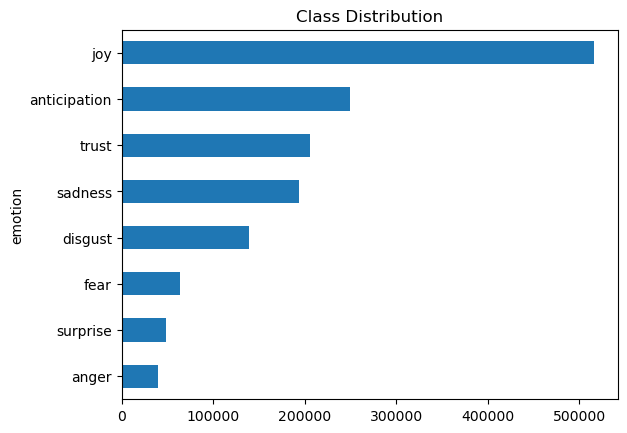

In [11]:
# And do statistic to see the class distribution
df_emotion['emotion'].value_counts(ascending=True).plot.barh()
plt.title('Class Distribution')
plt.show()

In [12]:
df_emotion['emotion'].value_counts(ascending=True)

emotion
anger            39867
surprise         48729
fear             63999
disgust         139101
sadness         193437
trust           205478
anticipation    248935
joy             516017
Name: count, dtype: int64

In [13]:
# Here just construct the transformation between emotion string and the corresponding labels.
emotion2label = {
    "joy": 0,
    "anticipation": 1,
    "trust": 2,
    "surprise": 3,
    "sadness": 4,
    "fear": 5,
    "disgust": 6,
    "anger": 7,
}

label2emotion = {
    0: "joy",
    1: "anticipation",
    2: "trust",
    3: "surprise",
    4: "sadness",
    5: "fear",
    6: "disgust",
    7: "anger",
}

In [14]:
# Here, I try to add the label to the text data frame and split the data frame to training set and testing set.
record = {}
for row in df_emotion.values:
    id = row[0]
    emotion = row[1]
    record[id] = emotion

def append_emotion(id):
    if id in record:
        return emotion2label[record[id]]
    else:
        return ""

df_text['label'] = df_text['tweet_id'].apply(append_emotion)

df_train = df_text[df_text['label'] != '']
df_test  = df_text[df_text['label'] == '']

/var/folders/qd/1t_jgbfs283c6qtfrpx9vrrr0000gn/T/ipykernel_2844/1958421097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['number of words'] = df_train['text'].str.split().apply(len)


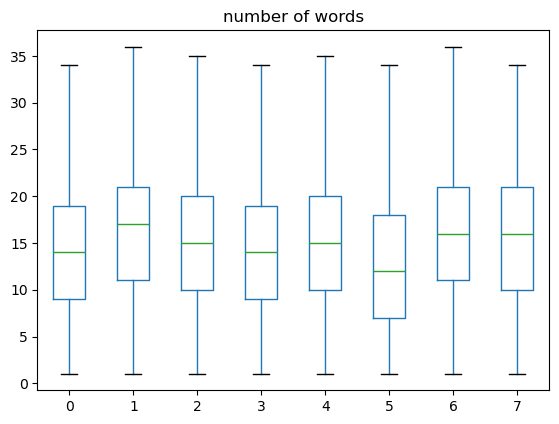

In [15]:
# I would like to do statistics of the number of words because it will affect the choice of model.
# More discussion in interpretation.
df_train['number of words'] = df_train['text'].str.split().apply(len)
df_train.boxplot('number of words', by='label', grid=False, showfliers=False)
plt.suptitle("")
plt.xlabel("")
plt.show()

In [16]:
# We can see the training data frame.
df_train = df_train.drop(columns=['number of words'])
df_train

,tweet_id,text,label
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",1
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",4
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,5
5,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,0
6,0x2c91a8,Still waiting on those supplies Liscus. <LH>,1
...,...,...,...
1867526,0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,0
1867527,0x38959e,In every circumtance I'd like to be thankful t...,0
1867528,0x2cbca6,there's currently two girls walking around the...,0
1867533,0x24faed,"Ah, corporate life, where you can date <LH> us...",0


In [17]:
# and testing data frame.
df_test

,tweet_id,text,label
2,0x28b412,"Confident of your obedience, I write to you, k...",
4,0x2de201,"""Trust is not the same as faith. A friend is s...",
9,0x218443,When do you have enough ? When are you satisfi...,
30,0x2939d5,"God woke you up, now chase the day #GodsPlan #...",
33,0x26289a,"In these tough times, who do YOU turn to as yo...",
...,...,...,...
1867525,0x2913b4,"""For this is the message that ye heard from th...",
1867529,0x2a980e,"""There is a lad here, which hath five barley l...",
1867530,0x316b80,When you buy the last 2 tickets remaining for ...,
1867531,0x29d0cb,I swear all this hard work gone pay off one da...,


In [20]:
# Here I just try to do double check that I have do nothing wrong. the id, spliting are both correct.
train_id = df_identification[df_identification['identification'] == 'train']

print(len(df_train['tweet_id']) == len(train_id['tweet_id']))
print(len(df_train['tweet_id']))
print(len(df_train['tweet_id'].unique()) == len(train_id['tweet_id'].unique()))
print(len(df_train['tweet_id'].unique()))
print(set(df_train['tweet_id']) == set(train_id['tweet_id']))

True
1455563
True
1455563
True


In [21]:
# The cell is aimed to balance the data by downsampling
# But it is not helpful for the performance, so I comment this cell. I will discuss more in the interpretation part.

# df_train_downsample = pd.DataFrame(columns=['tweet_id','text','label'])
# for i in range(8):
#     temp = df_train[df_train['label'] == i]
#     temp = temp.sample(n=39867,replace=True)
#     df_train_downsample = pd.concat([df_train_downsample, temp],axis=0)

# df_train_downsample = df_train_downsample.sample(frac=1) #shuffle the dataframe

### ****Interpretation:
1. In the above class distribution result, we observe the data is imbalance. To avoid the model biased by the data, I have tried to downsample the data, but the experiment result for downsampled data is poor: 

    Model:Distilbert

    validation accuracy: balance data: 0.51, imbalance data: 0.62
    public score: balance data: 0.42, imbalance data: 0.51

    I think fine-tune the large language model requires large amount of data because the number of parameters is large. Tuning the LLM is more crucial than the training of the classification. Which leads us to see this result. For the final result, I use imbalanced data also.

2. The number of words statistics:
   Because the number of words is less than 40, which is small size. Maximum length of Distilbert is 512, for tweetbert is 128, so the our model can handle the tweets very well without truncation, we dont need to consider the information loss.

In [22]:
# First we split the training data into training set and validation set.
# Then we packed the training, validation and testing data into the dataset format.
# Which is helpful for the hugging face pipeline.

df_train["random"] = list(np.random.random(len(df_train)))

# random value 0~1 --> choose the threshold 0.2 --> 80% training.
df_train_t = df_train[df_train['random'] > 0.2]
df_train_t = df_train_t.drop(columns=['random'])
df_train_v = df_train[df_train['random'] <= 0.2]
df_train_v = df_train_v.drop(columns=['random'])

from datasets import Dataset, DatasetDict

tds = Dataset.from_pandas(df_train_t)
vds = Dataset.from_pandas(df_train_v)

df_test_t = df_test.drop(columns=['label'])
tstds = Dataset.from_pandas(df_test_t)

ds = DatasetDict()
ds['train'] = tds
ds['validation'] = vds
ds['test'] = tstds

/Users/meiiansam/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/meiiansam/anaconda3/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/Users/meiiansam/anaconda3/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):


In [23]:
ds

DatasetDict({
    train: Dataset({
        features: ['tweet_id', 'text', 'label', '__index_level_0__'],
        num_rows: 1163647
    })
    validation: Dataset({
        features: ['tweet_id', 'text', 'label', '__index_level_0__'],
        num_rows: 291916
    })
    test: Dataset({
        features: ['tweet_id', 'text', '__index_level_0__'],
        num_rows: 411972
    })
})

## Load pretrained tokenizer, model

In [24]:
# Here, I load the pretrained tokenizer, do the tokenization in batch way.

#!pip3 install nltk emoji==0.6.0
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("vinai/bertweet-base", truncation=True, normalization = True) 
#### Note that the normalization parameter is important to let the tweet becomes normalized tweet.

# tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased") 

def tokenize(batch):
    return tokenizer(batch["text"], truncation=True)

ds_encoded = ds.map(tokenize, batched=True, batch_size=None)

Map: 100%|█████████████████████| 411972/411972 [00:48<00:00, 8534.49 examples/s]


In [25]:
# Here, we use add the classification heads (number =8) to the end of the tweetbert model.
from transformers import AutoModelForSequenceClassification

model_ckpt = "vinai/bertweet-base"
device = 'mps' if torch.backends.mps.is_available() else 'cpu' # I run it on my own laptop.
num_labels = 8
model = (AutoModelForSequenceClassification
        .from_pretrained(model_ckpt, num_labels=num_labels)
        .to(device))

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/bertweet-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [26]:
model

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(64001, 768, padding_idx=1)
      (position_embeddings): Embedding(130, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

### ****Interpretation:

After I join the competition and get familiar with the data, I decided to use the large language model without the trials of BOW/TFIDF/word2vec. Because in class we have known that BERT will perform the best already, the only disadvantage is it is a very huge model, it takes long time to train. But we can use the pretrain model on hugging face, 

First I try `distilbert`, which is the distil version of BERT-uncase. Because it is a smaller model but maintain 90\% performance, so I choose this model to have first attempt. However, it achieve public score 0.52 and hard to push. I dont want to try a larger model(BERT or BERT-large) because I dont have many GPU or good rescource to train the model.

Second, I search on the internet, and get the infomation about the `tweetbert`, which is trained by 845M Tweets. And this model provides a very good tokenizer, that used the `emoji` package to translate emotion icons into text strings, converting user mentions and url links into special tokens @USER and HTTPURL.

Note that, I know that RoBERTa is also better than bert, but tweetbert is based on RoBERTa already so I didn't try roberta.


## Training

In [28]:
# Here, select the metrics and training arguments.
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(ds_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned"

training_args = TrainingArguments(
    output_dir=model_name,
    num_train_epochs = 3,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    disable_tqdm=False,
    logging_steps=logging_steps,
    log_level="error",
    report_to="none"
)

In [29]:
trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=ds_encoded["train"],
    eval_dataset=ds_encoded["validation"],
    tokenizer=tokenizer,
)

In [30]:
trainer.train()

Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

*** Note that here I stop the training because this is only report. So the below cell is run by the initial trainer.

## Prediction and Output

In [35]:
# Here, predict the test data, and pick the class with most probability as output.
preds_output = trainer.predict(ds_encoded["test"])
y_preds = np.argmax(preds_output.predictions, axis=1)
output = pd.DataFrame() # form output dataframe.
output["id"] = ds_encoded["test"]['tweet_id']
output['pred'] = y_preds

In [36]:
#transform the label to emotion string and output the csv file.
def append_emotion_ret(y):
    return label2emotion[y]

output['emotion'] = output['pred'].apply(append_emotion_ret)
output = output.drop(columns=['pred'])
output.to_csv("submission.csv", index=False)

In [37]:
output

,id,emotion
0,0x28b412,joy
1,0x2de201,joy
2,0x218443,joy
3,0x2939d5,joy
4,0x26289a,joy
...,...,...
411967,0x2913b4,joy
411968,0x2a980e,joy
411969,0x316b80,joy
411970,0x29d0cb,joy


### ****Interpretation

1. I have tried different epochs, the performance of epoch = 2,3,4 don't have much difference. However, overfitting will occur after epoch is more than epoch = 6.
2. Because fine-tuning the model don't have much space for us to improve, so I want to try other models, like `tweetbert-large`. However, I failed because the my laptop will run out of memory during the training process. If I have enough hardware, I will try more.